# Receiver Operating Characteristics (ROC) Multiclass

In [1]:
# Importing necessary packages and dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# Loading and reading the data
iris = datasets.load_iris()

# Characteristics of dataset
print("Names of independent variables are: \n", iris.feature_names)
print("Categories present in dataset are: \n", iris.target_names)

x = iris.data
y = iris.target
print("Dimensions of dataset: ", x.shape)

Names of independent variables are: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categories present in dataset are: 
 ['setosa' 'versicolor' 'virginica']
Dimensions of dataset:  (150, 4)


In [3]:
# Binarize the dependent variable
y = label_binarize(y, classes = [0, 1, 2])
num_class = y.shape[1]
num_class

3

In [4]:
# Train-Test Split
x_trg, x_test, y_trg, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [5]:
# Using OneVsRest classifier for multiple classification
classifier = OneVsRestClassifier(svm.SVC(kernel = "linear", probability = True, random_state = 0))

In [6]:
# Fit and calculate the score
y_score = classifier.fit(x_trg, y_trg).decision_function(x_test)

In [7]:
y_score

array([[-3.58459897, -0.31176426,  1.78242707],
       [-2.15411929,  1.11402775, -2.393737  ],
       [ 1.89199335, -3.89624382, -6.29685764],
       [-4.52609987, -0.63389114,  1.96065819],
       [ 1.39684192, -1.77742447, -6.26300472],
       [-4.29544529, -1.45403694,  3.29458805],
       [ 1.60323992, -2.10436714, -6.37623283],
       [-2.65028866, -1.23856217, -0.51739315],
       [-2.86540149, -0.51680531, -0.7183625 ],
       [-1.98461469, -0.42890191, -1.70646586],
       [-3.74016002,  0.49686389,  0.82186705],
       [-2.38375773, -1.40495745, -0.60548048],
       [-2.64026621, -0.18330583, -0.76615536],
       [-2.6974942 , -0.48066147, -0.71100338],
       [-2.68086321, -0.48075311, -0.42256446],
       [ 1.65255174, -2.20173405, -6.40562627],
       [-2.52210662, -0.53055015, -0.52952971],
       [-2.41636546,  0.45117003, -0.99069072],
       [ 1.25101273, -0.81698465, -6.36116848],
       [ 1.74739869, -3.24458567, -6.25493848],
       [-3.18923262, -0.1604106 ,  1.000

In [8]:
# Creating dictionaries for FP, TP and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

In [9]:
# Execute ROC and compute ROC area for each class
for i in range(num_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

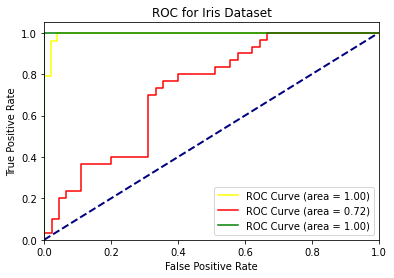

In [10]:
# Plot ROC curve for all the classes
plt.figure()
plt.plot([0,1], [0,1], color = "navy", lw = 2, linestyle = "--")
plt.plot(fpr[2], tpr[2], color = "yellow", label = "ROC Curve (area = %0.2f)" % roc_auc[2])
plt.plot(fpr[1], tpr[1], color = "red", label = "ROC Curve (area = %0.2f)" % roc_auc[1])
plt.plot(fpr[0], tpr[0], color = "green", label = "ROC Curve (area = %0.2f)" % roc_auc[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Iris Dataset")
plt.legend(loc = "lower right")
plt.show()